In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from datetime import datetime
from sklearn.feature_selection import SelectKBest, mutual_info_classif




# Cleaning

In [3]:
df = pd.read_csv('critical_mention_report_2023-02-17.csv')
date_format = "%b %d, %Y %I:%M %p %Z"
len(df)

8292

In [13]:
#Cleaning Data
df = df.dropna(axis=1, how='all')

print(len(df))

df.drop(['Online + Print Source Name', 'Online + Print Author', 'Channel Name', 'Online + Print Source Page', 'Estimated Local Audience', 'Estimated Local Publicity Value', 'Text', 'URL', 'Last Updated', 'Text ID', 'Thumbnail', 'Source', 'Clip ID', 'License Name', 'Copyright'], axis=1)

#for exporting cleaned data
def export_dropna(df):
    df.to_csv('score_data_cleaned.csv', index=False)
#export_dropna(df)


8292


In [5]:
#Making the Dates Datetime objects
date_format_1 = '%m/%d/%Y %I:%M:%S %p'
date_format_2 = '%I:%M %p'

# Define a function to convert a single time string to a datetime object, removing 'CDT'
def convert_time_string(time_str):
    # Remove the last 4 characters (' CDT') from the time string
    time_str = time_str[:-4]
    
    # Parse the time string to a datetime object without timezone information
    datetime_obj = datetime.strptime(time_str, date_format_2)
    
    return datetime_obj

# Apply the function to the 'time_str' column to create a new 'datetime' column
df['Broadcast Time'] = df['Broadcast Time'].apply(convert_time_string)


df['Date and Time'] = df['Time Clip'].apply(lambda x: datetime.strptime(x, date_format_1))

In [6]:
#Making Broadcast time a quantitative variable

def time_to_total_mins(time):
    # Remove the last 4 characters (' CDT') from the time string
    mins = 60*time.hour + time.minute
    return mins

df['Local Time in Minutes'] = df['Broadcast Time'].apply(time_to_total_mins)

# Seeing which markets bring in the most National Audience/Publicity Value

In [7]:
# Group by Market and calculate the mean of Estimated National Audience
national_audience_by_market = df.groupby('Market')['Estimated National Audience'].mean()

# Sort by mean national audience in descending order
sorted_national_audience = national_audience_by_market.sort_values(ascending=False)

# Print the top 10 markets by mean national audience
print('Top 10 Markets by Mean National Audience:')
for i, (market, audience) in enumerate(sorted_national_audience.items()):
    if i >= 10:
        break
    formatted_audience = f'{audience:.0f}'
    print(f'{i+1}. {market}: {formatted_audience}')



Top 10 Markets by Mean National Audience:
1. Butetown, Wales: 139017428
2. Westerville, OH: 18177317
3. United Kingdom: 8104861
4. District of Columbia, US: 3428026
5. United States: 2346335
6. Deerfield, IL: 2262391
7. Highland Park, IL: 2262391
8. Bensalem, PA: 2262391
9. Northbrook, IL: 2262391
10. State College, PA: 1942964


In [8]:
# Group by Market and calculate the mean of Estimated National Audience
pv_by_market = df.groupby('Market')['Estimated National Publicity Value'].mean()

# Sort by mean national audience in descending order
sorted_pv = pv_by_market.sort_values(ascending=False)

# Print the top 10 markets by mean national audience
print('Top 10 Markets by Mean National Audience:')
for i, (market, pv) in enumerate(sorted_pv.items()):
    if i >= 10:
        break
    formatted_pv = f'{pv:.0f}'
    print(f'{i+1}. {market}: {formatted_pv}')

Top 10 Markets by Mean National Audience:
1. Butetown, Wales: 1604311
2. Westerville, OH: 230092
3. District of Columbia, US: 68481
4. United States: 66282
5. United Kingdom: 54861
6. Vestal, NY: 29131
7. Bensalem, PA: 28483
8. Casa Grande, AZ: 25476
9. Norwich, CT: 18324
10. Warminster, PA: 18013


In [9]:
#Making dummy variables for the Radio Center

dummy_station = pd.get_dummies(df['Station Affiliate'])
# df = pd.concat([df, dummy_station], axis=1)

dummy_media_type = pd.get_dummies(df['Media Type'])
# df = pd.concat([df, dummy_media_type], axis=1)


# Correlating Publicty Value/Audience to Time of Day

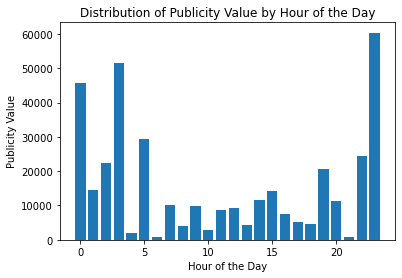

In [10]:
import matplotlib.pyplot as plt

# Extract the hour of the day from the datetime column
df['hour'] = df['Date and Time'].dt.hour

# Group the data by hour and compute the mean publicity value for each hour
hourly_means = df.groupby('hour')['Estimated National Publicity Value'].mean()

# Plot the hourly means as a bar chart
plt.bar(hourly_means.index, hourly_means.values)

# Add labels and title to the plot
plt.xlabel('Hour of the Day')
plt.ylabel('Publicity Value')
plt.title('Distribution of Publicity Value by Hour of the Day')

# Show the plot
plt.show()


In [11]:
a = pd.DataFrame(df.groupby('Keywords').size())

a.head(30)

,0
Keywords,
"ASK SCORE,Business,Score advisers,SCORE, Mentors,assistance,SCOREMentors,SCORE program,chapters,business,SCORE dot org,Small,score dot org,Workshops,Biz Tip of the Week,Mentors,Nonprofit,Score advisors,SCOREFans,SCORE Workshop,SCORE workshop,Score volunteers,consulting,Score business plan,volunteer,American,SCORE.org,free,Workshop,Mentor,SCORE topics,Service Corps of Retired Executives,score mentor,SCORE Client,non-profit,Score volunteer,SCORE Workshops,SCORE Foundation,SCORE,SCORE Mentors,Championship,Score blog,Score webinar,workshops,Score advisor,Volunteers,nonprofit,volunteers,SCORE Chapter,score mentors,SCORE awards,Score volunteering,SCORE Association,score.org,adviser",8
"ASK SCORE,Business,Score business plan,Score volunteering,SCORE topics,volunteers,Championship,Workshops,SCOREMentors,score mentor,SCORE awards,Workshop,Mentor,SCORE dot org,Score advisors,non-profit,SCORE Client,SCORE.org,score.org,volunteer,SCORE Association,consulting,assistance,business,nonprofit,Score volunteer,workshops,American,Score volunteers,SCORE Workshop,SCORE Chapter,SCORE,SCORE Foundation,SCORE workshop,Score blog,Score advisor,adviser,Score advisers,free,score dot org,Score webinar,Biz Tip of the Week,Service Corps of Retired Executives,SCORE, Mentors,SCOREFans,score mentors,Volunteers,Small,SCORE Workshops,SCORE program,SCORE Mentors,chapters,Nonprofit,Mentors",10
"ASK SCORE,SCORE, Mentors,Mentor,SCORE Foundation,volunteers,SCORE Chapter,Score volunteering,Service Corps of Retired Executives,SCORE,SCORE dot org,Mentors,Championship,SCORE awards,SCOREMentors,SCORE.org,Score advisers,workshops,Score advisors,Biz Tip of the Week,non-profit,SCORE workshop,Score volunteer,assistance,Workshop,business,SCORE program,SCORE Mentors,consulting,adviser,score mentor,chapters,SCORE topics,SCORE Workshop,Nonprofit,nonprofit,score mentors,free,Volunteers,Score blog,American,Score volunteers,SCORE Workshops,Score advisor,score dot org,Workshops,score.org,volunteer,SCORE Client,SCORE Association,Score business plan,Score webinar,SCOREFans,Small,Business",7
"ASK SCORE,SCOREFans,SCORE dot org,SCORE Association,Score advisers,Service Corps of Retired Executives,SCORE,SCORE awards,nonprofit,consulting,American,SCORE Chapter,assistance,SCORE program,Volunteers,Score volunteer,SCORE, Mentors,Score blog,Mentors,SCORE Workshops,score.org,score dot org,SCORE Client,Score business plan,adviser,SCORE topics,Small,score mentors,Score advisors,Workshop,workshops,volunteers,Business,SCOREMentors,Championship,Score volunteering,SCORE workshop,volunteer,Workshops,Mentor,SCORE Workshop,Score advisor,Biz Tip of the Week,Nonprofit,Score volunteers,score mentor,non-profit,chapters,SCORE Foundation,business,Score webinar,SCORE Mentors,SCORE.org,free",8
"ASK SCORE,Score volunteering,Biz Tip of the Week,SCORE Workshop,SCORE Chapter,Score volunteer,chapters,workshops,consulting,score dot org,business,SCORE.org,SCORE awards,SCORE Workshops,Service Corps of Retired Executives,Championship,volunteers,SCOREFans,Score advisor,non-profit,SCORE, Mentors,Volunteers,assistance,SCORE workshop,nonprofit,Score blog,Workshop,SCORE Mentors,SCORE program,Workshops,Business,Score business plan,score mentors,Mentors,SCORE dot org,free,Small,adviser,Score advisers,SCOREMentors,Score volunteers,Nonprofit,score.org,SCORE topics,SCORE Client,volunteer,score mentor,Score advisors,Mentor,Score webinar,SCORE,American,SCORE Foundation,SCORE Association",3
"ASK SCORE,assistance,Biz Tip of the Week,volunteers,workshops,SCORE Association,Business,SCORE workshop,nonprofit,Score volunteers,Volunteers,Score advisers,SCORE program,Service Corps of Retired Executives,SCORE Chapter,chapters,free,Workshop,non-profit,SCORE topics,business,Small,SCORE awards,Score business plan,Score advisors,Championship,SCORE.org,SCORE Workshops,Workshops,SCOREMentors,score.org,American,Mentors,Score advisor,SCORE dot org,score dot org,Nonprofit,Mentor,SCORE, Mentors,Score blog,Score volunteer,score mentor,advise